# Training autoencoder to classify MNIST

## Loading MNIST

In [1]:
import torch
import numpy as np
from torchvision import datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from tqdm import tqdm
from utils import set_random_seed
from utils_dataset import load_MNIST, Autoencoder_linear, load_dataset
from torch.utils.data import TensorDataset, DataLoader, Dataset, Subset
from torchvision.datasets import MNIST

generator = set_random_seed(42, add_generator=True)

device = "cuda" if torch.cuda.is_available() else "cpu"
# TODO: num_workers > 0 and pin_memory True does not work on pytorch 1.12
# try pytorch 1.13 with CUDA > 1.3
kwargs = {'num_workers': 4, 'pin_memory': True}

trainset = MNIST(root='data', train=True, download=True)
list_transforms = [transforms.ToTensor(), transforms.Normalize((trainset.data.float().mean() / 255,),
                                                               (trainset.data.float().std() / 255,))]

# Train:
trainset = MNIST(root='data', train=True, download=True,
                 transform=transforms.Compose(list_transforms))
train_loader = DataLoader(trainset,
                          batch_size=32,
                          shuffle=True,
                          generator=generator,
                          **kwargs)
print(f'N samples training: {len(trainset.data)}')

# Test:
testset = MNIST(root='data', train=False, download=True,
                transform=transforms.Compose(list_transforms))
test_loader = DataLoader(testset,
                         batch_size=32,
                         shuffle=True,
                         generator=generator,
                         **kwargs)
print(f'N samples test: {len(testset.data)}')
dataloader = train_loader

N samples training: 60000
N samples test: 10000


### Plot one MNIST digit

<AxesSubplot:>

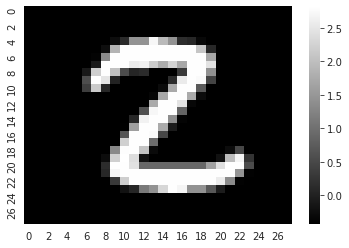

In [3]:
%matplotlib inline
import seaborn as sns

# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy()

# get one image from the batch
img = np.squeeze(images[0])

fig = plt.figure()
ax = fig.add_subplot(111)
sns.heatmap(img, cmap='gray')

# Load learned weights

In [3]:
# To load afterwards:
encoding_dim = 24
model = Autoencoder_linear(encoding_dim)
model.load_state_dict(torch.load('./data/784MNIST_2_24MNIST.pt'))
print(model)

Autoencoder_linear(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=96, bias=True)
    (1): ReLU()
    (2): Linear(in_features=96, out_features=48, bias=True)
    (3): ReLU()
    (4): Linear(in_features=48, out_features=24, bias=True)
    (5): ReLU()
  )
  (decoder): Sequential(
    (0): Linear(in_features=24, out_features=48, bias=True)
    (1): ReLU()
    (2): Linear(in_features=48, out_features=96, bias=True)
    (3): ReLU()
    (4): Linear(in_features=96, out_features=784, bias=True)
    (5): ReLU()
  )
)


# Plot encoded images

torch.Size([32, 24])


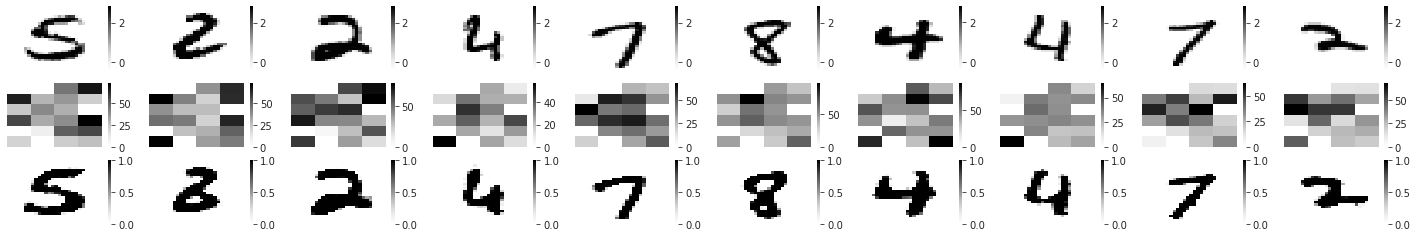

In [12]:
import seaborn as sns

# obtain one batch of test images
dataiter = iter(test_loader)
images, labels = dataiter.next()

images_flatten = images.view(images.size(0), -1)
assert all(images_flatten[0] == images[0].flatten())

# get sample outputs
output = model(images_flatten.float())
encs = model.encoder(images_flatten.float()).clone().detach()
print(encs.shape)
encs = torch.reshape(encs, (encs.shape[0], 6, 4))
# prep images for display
images = images.numpy()

# output is resized into a batch of images
output = output.view(encs.shape[0], 1, 28, 28)
# use detach when it's an output that requires_grad
output = output.detach().numpy()

# plot the first ten input images and then reconstructed images
fig, axes = plt.subplots(nrows=3, ncols=10, figsize=(25,4))

#input images on top row, reconstructions on bottom
for images_, row in zip([images, encs, output], axes):
    for img, ax in zip(images_, row):
        sns.heatmap(np.squeeze(img), ax=ax, cmap='Greys')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

assert all(images_flatten[0] == torch.tensor(images)[0].flatten())

torch.Size([32, 24])

In [2]:
# Load compressed MNIST

In [2]:
dict_dataset = load_dataset('MNIST',
                            batch_size=100,
                            stim_len_sec=3,
                            dt_sec=0.001,
                            v_max=0.2,
                            generator=generator,
                            add_noise=True,
                            return_fft=False,
                            n_samples_train=-1,
                            n_samples_test=-1,
                            shuffle=True,
                            compressed=True,
                            encoder_model='./data/784MNIST_2_24MNIST.pt')

Autoencoder_linear(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=96, bias=True)
    (1): ReLU()
    (2): Linear(in_features=96, out_features=48, bias=True)
    (3): ReLU()
    (4): Linear(in_features=48, out_features=24, bias=True)
    (5): ReLU()
  )
  (decoder): Sequential(
    (0): Linear(in_features=24, out_features=48, bias=True)
    (1): ReLU()
    (2): Linear(in_features=48, out_features=96, bias=True)
    (3): ReLU()
    (4): Linear(in_features=96, out_features=784, bias=True)
    (5): ReLU()
  )
)
torch.Size([1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([1, 28, 28])torch.Size([1, 28, 28])torch.Size([1, 28, 28])

torch.Size([1, 28, 28])

torch.Size([1, 28, 28])
torch.Size([1, 28, 28])


IndexError: Caught IndexError in DataLoader worker process 0.
Original Traceback (most recent call last):
  File "/home/nicoletta/anaconda3/envs/pytorch_gpu_v2e/lib/python3.9/site-packages/torch/utils/data/_utils/worker.py", line 302, in _worker_loop
    data = fetcher.fetch(index)
  File "/home/nicoletta/anaconda3/envs/pytorch_gpu_v2e/lib/python3.9/site-packages/torch/utils/data/_utils/fetch.py", line 49, in fetch
    data = [self.dataset[idx] for idx in possibly_batched_index]
  File "/home/nicoletta/anaconda3/envs/pytorch_gpu_v2e/lib/python3.9/site-packages/torch/utils/data/_utils/fetch.py", line 49, in <listcomp>
    data = [self.dataset[idx] for idx in possibly_batched_index]
  File "/home/nicoletta/anaconda3/envs/pytorch_gpu_v2e/lib/python3.9/site-packages/torchvision/datasets/mnist.py", line 145, in __getitem__
    img = self.transform(img)
  File "/home/nicoletta/anaconda3/envs/pytorch_gpu_v2e/lib/python3.9/site-packages/torchvision/transforms/transforms.py", line 94, in __call__
    img = t(img)
  File "/home/nicoletta/Documents/Repositories/tactile_encoding/utils_dataset.py", line 105, in __call__
    sample = sample.flatten(start_dim=1, end_dim=2).unsqueeze(1).repeat(1, self.n_time_steps, 1)
IndexError: Dimension out of range (expected to be in range of [-1, 0], but got 1)
